In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, auc, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
print("We're using TF", tf.__version__)
print("We are using Keras", keras.__version__)

We're using TF 2.8.0
We are using Keras 2.8.0


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#pip install pandas-profiling

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1TPaBgFKxPhXCaVrdmHnb9wvoYcZESfBO', header = 1)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0    Timestamp     449919 non-null  object 
 1   FIT101         449919 non-null  float64
 2   LIT101         449919 non-null  float64
 3    MV101         449919 non-null  int64  
 4   P101           449919 non-null  int64  
 5   P102           449919 non-null  int64  
 6    AIT201        449919 non-null  float64
 7   AIT202         449919 non-null  float64
 8   AIT203         449919 non-null  float64
 9   FIT201         449919 non-null  float64
 10   MV201         449919 non-null  int64  
 11   P201          449919 non-null  int64  
 12   P202          449919 non-null  int64  
 13  P203           449919 non-null  int64  
 14   P204          449919 non-null  int64  
 15  P205           449919 non-null  int64  
 16  P206           449919 non-null  int64  
 17  DPIT301        449919 non-nul

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,P201,P202,P203,P204,P205,P206,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P401,P402,P403,P404,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1,19.74838,2.206835,956.1651,1,2,1,1,1,2,148.808,156.0882,1.713517,942.0662,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723789,1.279621,0.735269,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1,19.74838,2.208244,956.1651,1,2,1,1,1,2,148.808,156.0882,1.715952,942.0277,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723789,1.297554,0.735269,0.307786,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1,19.69076,2.208628,956.4855,1,2,1,1,1,2,148.808,156.0882,1.715952,941.8739,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723404,1.293967,0.735269,0.308619,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1,19.69076,2.208628,956.8060,1,2,1,1,1,2,148.808,156.0882,1.714670,941.7970,1,2,1,1,2,7.878621,145.0141,264.5475,12.03538,1.723404,1.281158,0.735269,0.308619,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,1,1,2,1,2,1,19.69076,2.208628,957.0864,1,2,1,1,1,2,148.808,156.0882,1.714670,942.2200,1,2,1,1,2,7.878621,144.8859,264.5475,12.03538,1.723404,1.281158,0.735269,0.308619,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


## Предобработка данных

In [ ]:
df.columns

Index([' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201',
       'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203',
       ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602',
       'P603', 'Normal/Attack'],
      dtype='object')

In [ ]:
# Убираем пустые пространства из названия столбцов
df.columns = df.columns.str.replace(' ', '')

In [ ]:
#df.profile_report()

In [ ]:
# Признаки (из данных полученных в pandas.profiling), принимающие единственное значение необходимо удалить
drop_cols = ['P202', 'P301', 'P401', 'P404', 'P502', 'P601', 'P603']
df.drop(drop_cols, axis = 1, inplace=True)

После удаления данных признаков у нас осталось 19 категориальных и 25 количественных признаков

In [ ]:
# количественные признаки
num_cols = ['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 
            'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 
            'FIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601']
# категориальные признаки
cat_cols = ['MV101', 'P101', 'P102', 'MV201', 'P201', 'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302',
            'MV303', 'MV304', 'P302', 'P402', 'P403', 'UV401', 'P501', 'P602']

In [ ]:
# Переименуем нашу целевую переменную
df = df.rename(columns={'Normal/Attack':'target'})

# Уберем пустые пространства в написании значения целевой переменной
df.target = df.target.apply(lambda x: 'Attack' if x == 'A ttack' else x)

In [ ]:
# Перекодируем целевую переменную target в числовые значения с помощью LabelEncoder.
label_encoder = LabelEncoder()

df['target'] = label_encoder.fit_transform(df['target'])
df['target'] = df['target'].apply(lambda x: 0 if x == 1 else 1)

## Подготовка данных к обучению нейронной сети

In [ ]:
# Стандартизация числовых переменных
X_num = df[num_cols].values

In [ ]:
#Осуществим dummy-кодирование категориальных переменных
X_cat = OneHotEncoder(sparse = False).fit_transform(df[cat_cols].values)

In [ ]:
# Объединим стандартизованные числовые и закодированные категориальные переменные в одно признаковое пространство, 
# разделив при этом признаки и целевую переменную.
X = np.hstack([X_num, X_cat])
y = df['target'].values

In [ ]:
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size = 0.5, random_state = 42, stratify = y)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.5, random_state = 42, stratify = y_valid_test)

In [ ]:
# стандартная нормализация
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
y_train_oh = keras.utils.to_categorical(y_train, 2)
y_valid_oh = keras.utils.to_categorical(y_valid, 2)

print(y_train_oh.shape)
print(y_train_oh[:5], y_train[:5])

(224959, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] [0 0 0 0 0]


## Обучение нейронной сети

In [ ]:
X_train.shape[1]

69

In [ ]:
clear_session()

In [ ]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8960      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 17,346
Trainable params: 17,346
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
print(X_train.shape)
print(y_train_oh.shape)

(224959, 69)
(224959, 2)


In [ ]:
print(X_valid.shape)
print(y_valid_oh.shape)

(112480, 69)
(112480, 2)


In [ ]:
model.fit(X_train, 
          y_train_oh, 
          epochs = 10, 
          validation_data = (X_valid, y_valid_oh))

Epoch 1/10
7030/7030 [==============================] - 25s 3ms/step - loss: 0.0624 - accuracy: 0.9831 - val_loss: 0.0396 - val_accuracy: 0.9884
Epoch 2/10
7030/7030 [==============================] - 18s 3ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0286 - val_accuracy: 0.9911
Epoch 3/10
7030/7030 [==============================] - 18s 3ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0257 - val_accuracy: 0.9915
Epoch 4/10
7030/7030 [==============================] - 18s 3ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0241 - val_accuracy: 0.9920
Epoch 5/10
7030/7030 [==============================] - 16s 2ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0191 - val_accuracy: 0.9931
Epoch 6/10
7030/7030 [==============================] - 20s 3ms/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0218 - val_accuracy: 0.9917
Epoch 7/10
7030/7030 [==============================] - 27s 4ms/step - loss: 0.0188 - accuracy: 0.9935 - val_loss: 0.0191 - val_ac

In [ ]:
y_test_pred = np.argmax(model.predict(X_test), axis = 1)

In [ ]:
print('Accuracy = {}'.format(accuracy_score(y_test, y_test_pred)))
print('f1 = {}'.format(f1_score(y_test, y_test_pred)))

Accuracy = 0.9942300853485064
f1 = 0.9759567295224687


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print('Confusion matrix:')
print(tp, fp) 
print(fn, tn)

Confusion matrix:
13172 166
483 98659


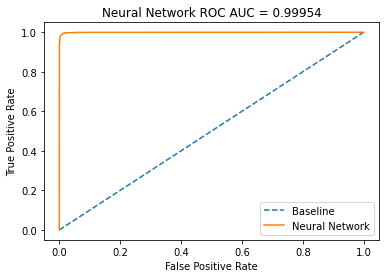

<Figure size 432x288 with 0 Axes>

In [ ]:
probs = model.predict(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Neural Network')
plt.title('Neural Network ROC AUC = %0.5f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

plt.savefig('./roc_curve_nn.jpeg')

**Вывод:** Обученная нейронная сеть, состоящая из 3-х полносвязных слоёв дала следующие показатели метрик Accuracy = 0.9945, f1 = 0.97741, confusion_matrix = [[13265, 223], [390 98602]], ROC_AUC = 0.9995. Это является хорошим показателем работы нейронной сети, которая предсказывает 99,5 % атак на систему.